In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from keras import regularizers

from sklearn.metrics import recall_score
from sklearn.model_selection import KFold

In [85]:
def relu_dropout(X_train:pd.DataFrame, X_test:pd.DataFrame, y_train:list, y_test:list):
  """_summary_

  Args:
      X_train (pd.DataFrame): _description_
      X_test (pd.DataFrame): _description_
      y_train (list): _description_
      y_test (list): _description_
  """
  model = Sequential()
  model.add(Dense(5, activation='relu', input_dim=X_train.shape[1], 
                  kernel_regularizer=regularizers.l1(0.01)))  # L1 regularization
  model.add(Dropout(0.5))  # Dropout layer after the first hidden layer
  model.add(Dense(15, activation='relu', 
                  kernel_regularizer=regularizers.l1(0.01)))  # L1 regularization
  model.add(Dense(1, activation='sigmoid'))  # Output layer

  # Compile the model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Train the model
  history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_split=0.3)

  # Evaluate the model
  loss, accuracy = model.evaluate(X_test, y_test)
  print(f"Test Accuracy: {accuracy}")
  print(f"Test Loss is {loss}")
  
  return history


def min_max_scaler(X:pd.DataFrame, y:np.array):
  """_summary_

  Args:
      x (pd.DataFrame): _description_
      y (np.array): _description_
  """
  
  min_max_scaler =  MinMaxScaler()

  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

  X_train_scaled, X_test_scaled = min_max_scaler.fit_transform(X_train), min_max_scaler.fit_transform(X_test)

  return [X_train_scaled, X_test_scaled, y_train, y_test]


def standard_scaled(X:pd.DataFrame, y:np.array):
  """_summary_

  Args:
      x (pd.DataFrame): _description_
      y (np.array): _description_
  """
  
  min_max_scaler =  StandardScaler()

  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

  X_train_scaled, X_test_scaled = min_max_scaler.fit_transform(X_train), min_max_scaler.fit_transform(X_test)

  return [X_train_scaled, X_test_scaled, y_train, y_test]

def outlier_detection(df:pd.DataFrame):
  """_summary_

  Args:
      df (pd.DataFrame): _description_
  """
  
  for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= (Q1 - 1.5*IQR)) & (df[col] <= (Q3 + 1.5*IQR))]
  
  return df

def logistic_regression_analysis(X_train:pd.DataFrame, X_test:pd.DataFrame, y_train:list, y_test:list)->None:
  """_summary_

  Args:
      df (_type_): _description_
  """
  
  
  
  logistic_regression = LogisticRegression(penalty="l2", solver='liblinear')

  logistic_regression.fit(X_train, y_train)

  y_predictions = logistic_regression.predict(X_test)
  
  accuracy = accuracy_score(y_test,y_predictions)
  
  print(classification_report(y_test,y_predictions))

  print(f"The Accuracy: {accuracy}")
  
def support_vector_machine(X_train:pd.DataFrame, X_test:pd.DataFrame, y_train:list, y_test:list):
  """_summary_

  Args:
      X_train (_type_): _description_
      X_test (_type_): _description_
      y_train (_type_): _description_
      y_test (_type_): _description_
  """
  
  svm_model = SVC()
  svm_model.fit(X_train, y_train)
  svm_pred = svm_model.predict(X_test)
  print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

In [86]:
df = pd.read_csv("data.csv")

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [88]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [89]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [90]:
df["diagnosis"] = df["diagnosis"].apply(lambda x: 1 if x == "M" else 0)

<Axes: >

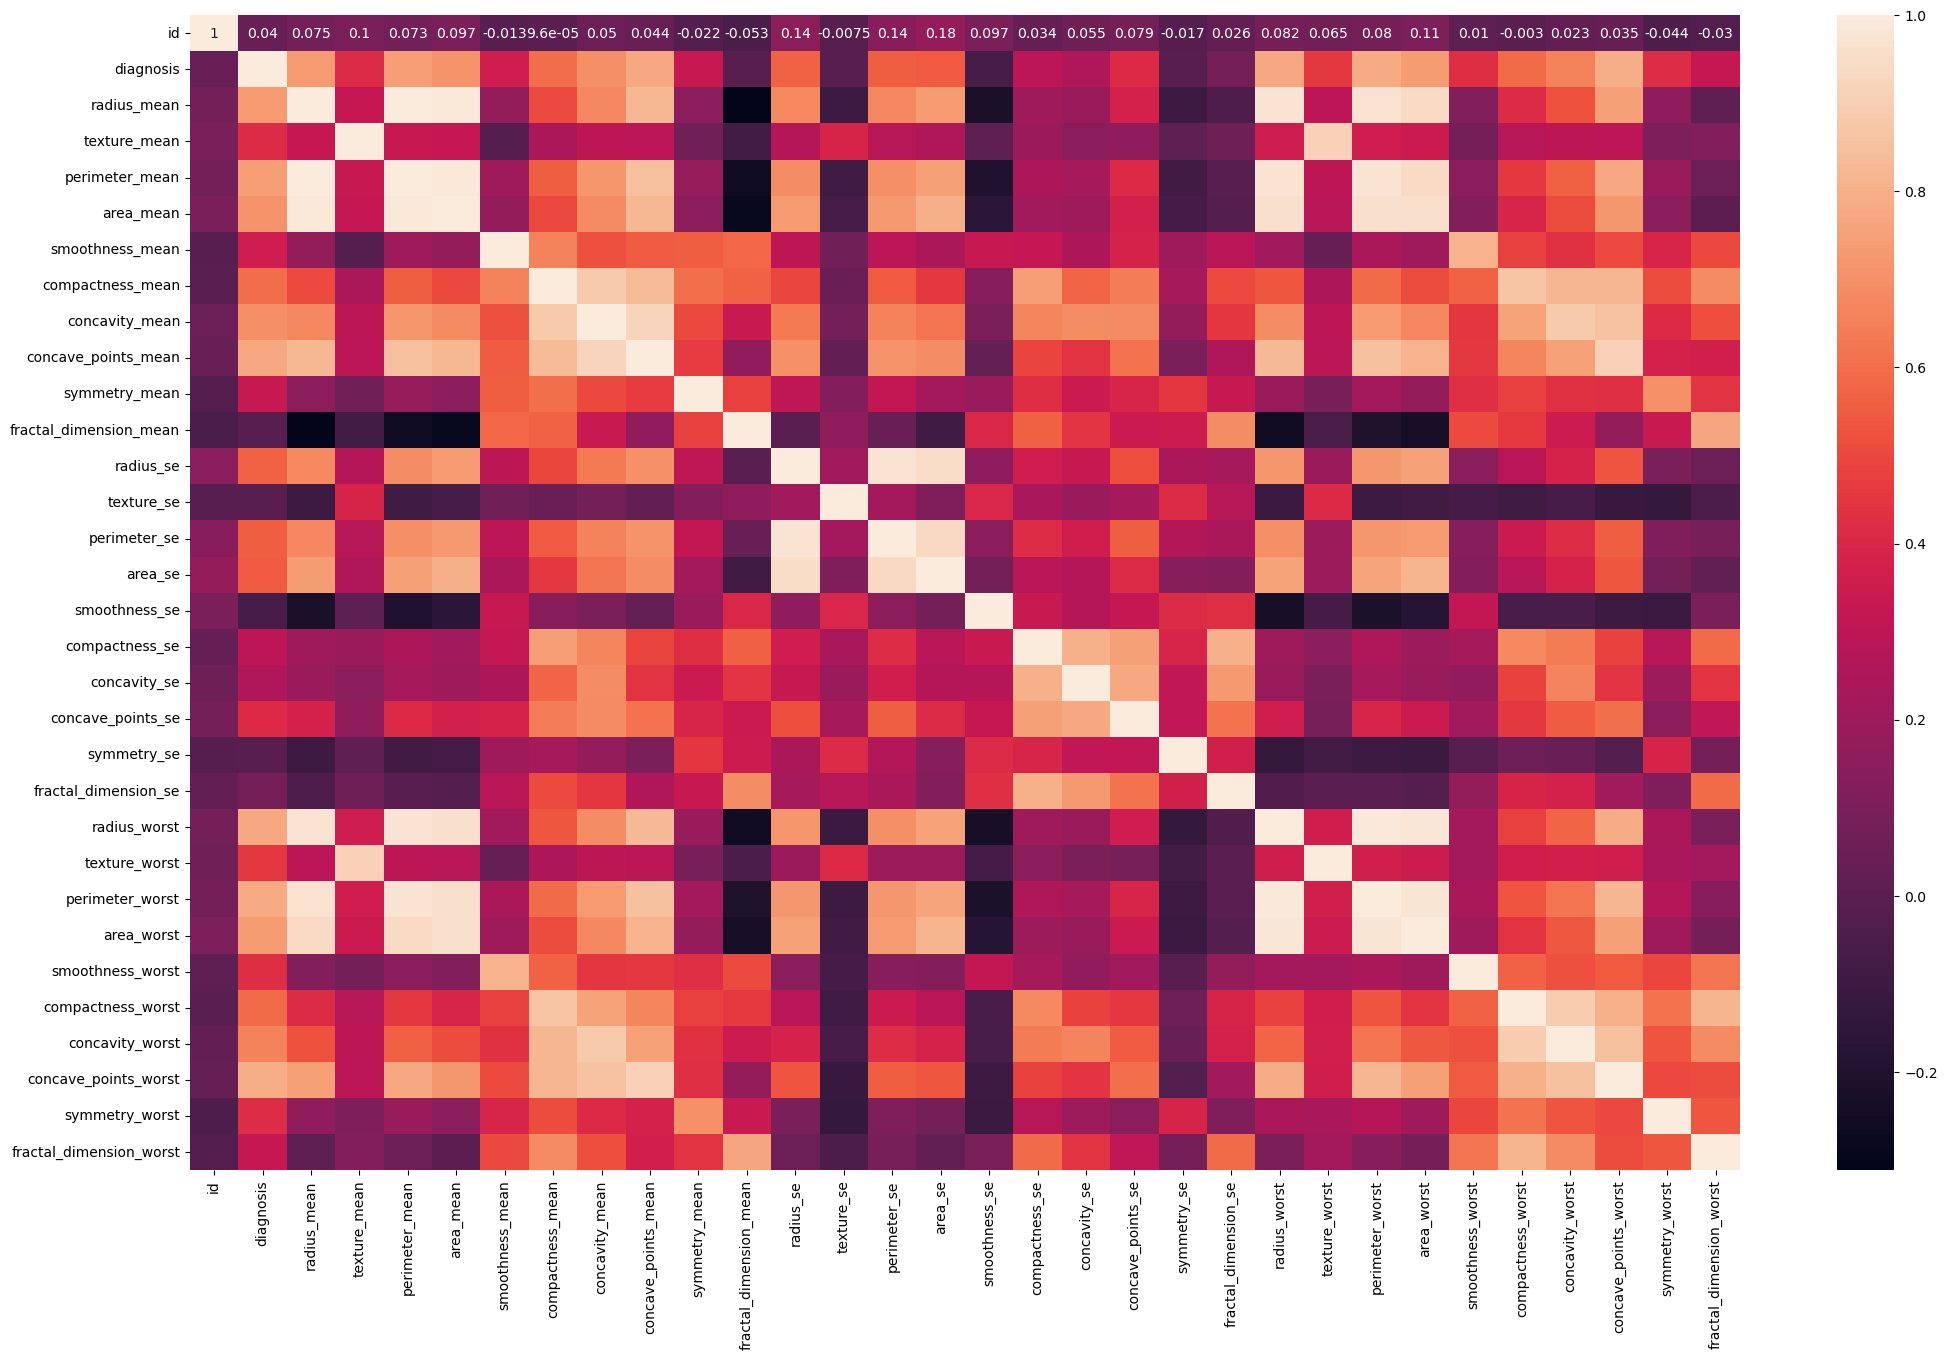

In [91]:
relations = df.corr()
plt.figure(figsize=(25,15))
sns.heatmap(relations, annot=True)

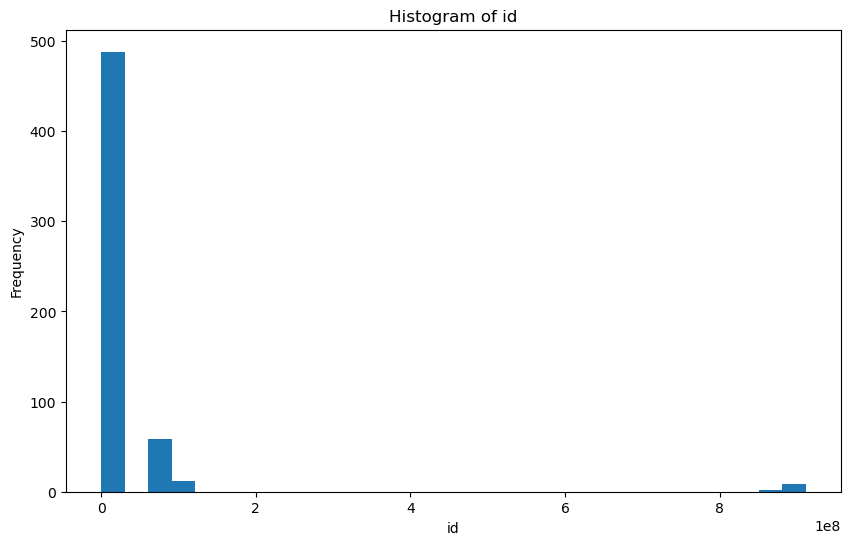

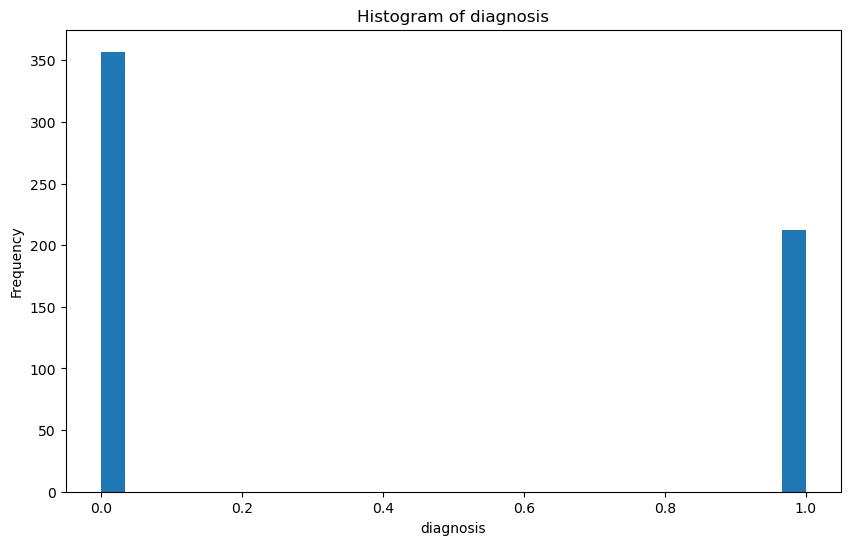

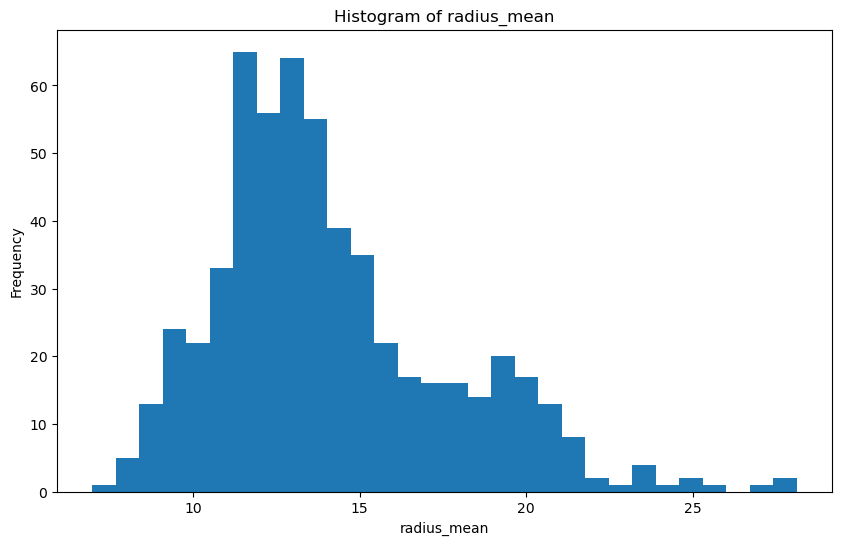

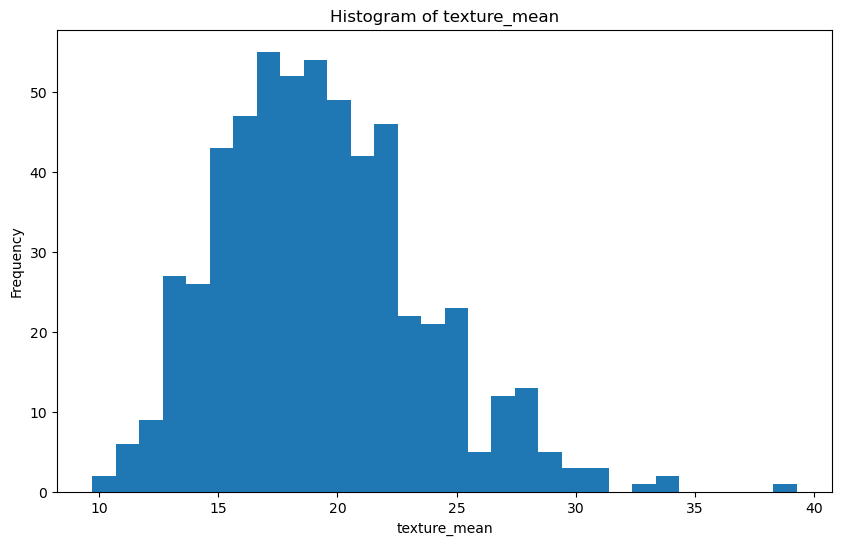

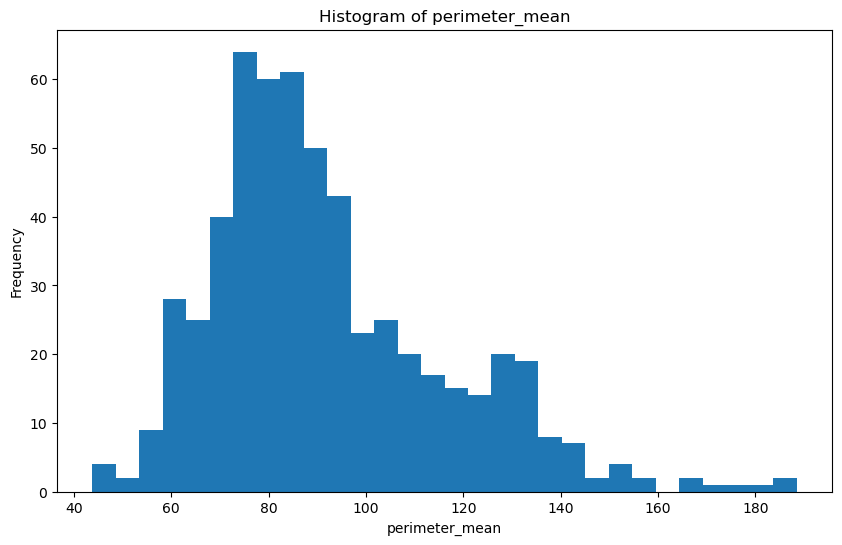

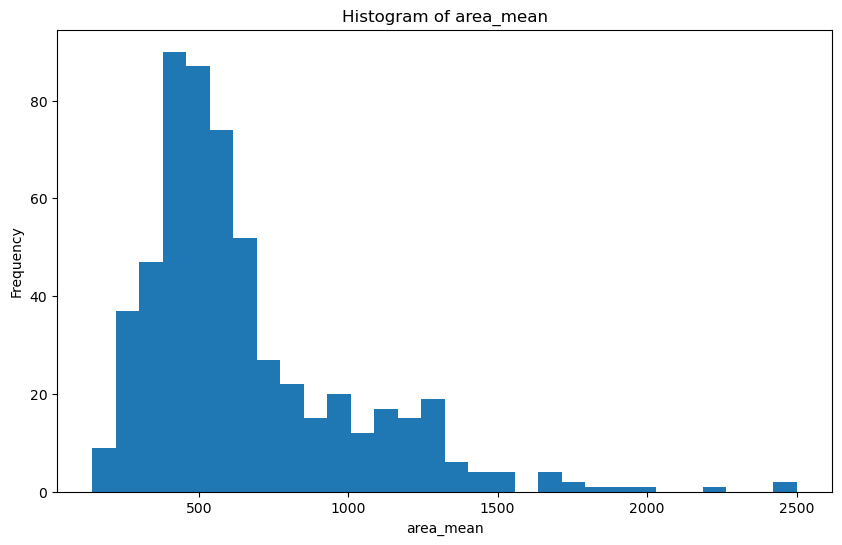

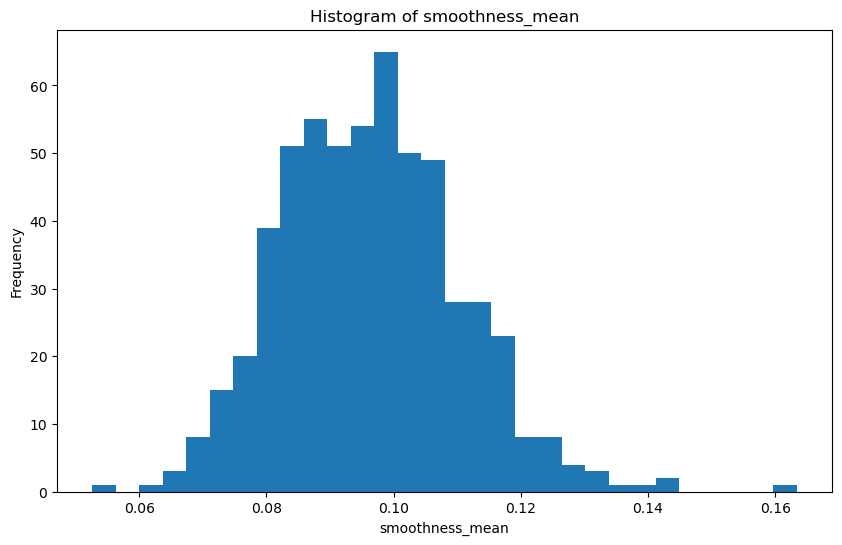

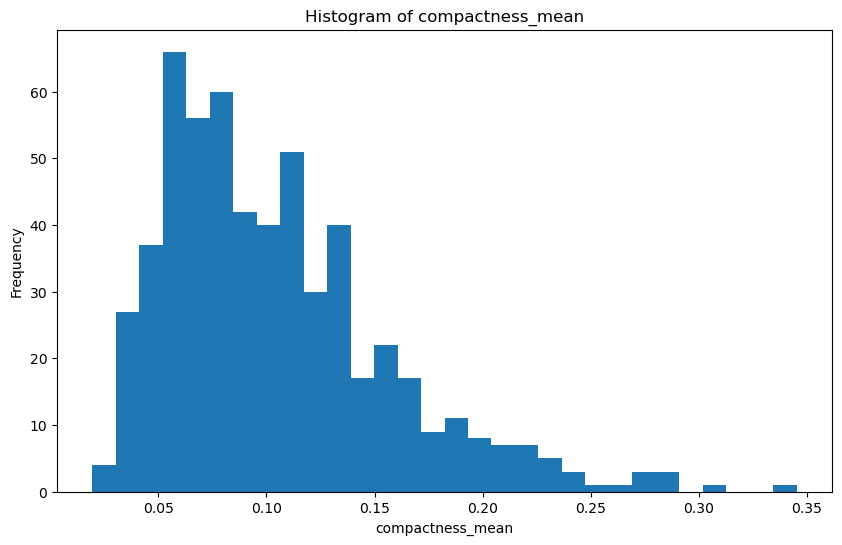

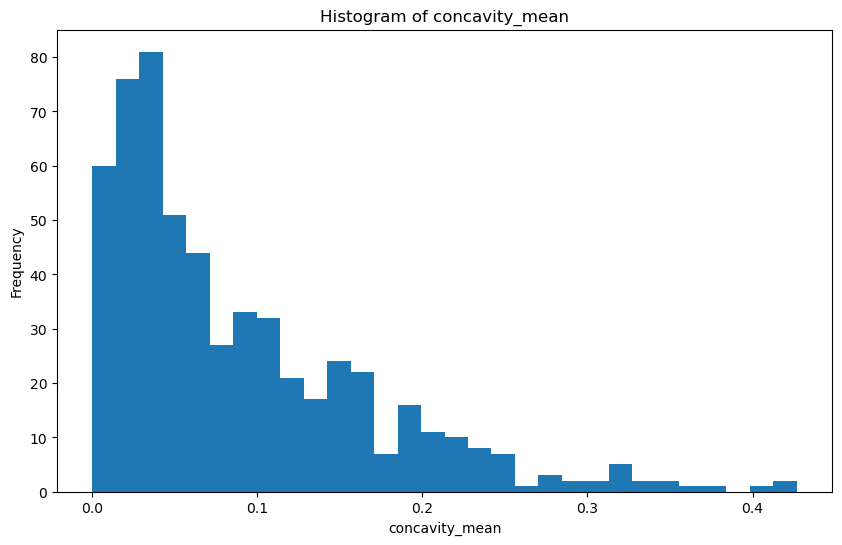

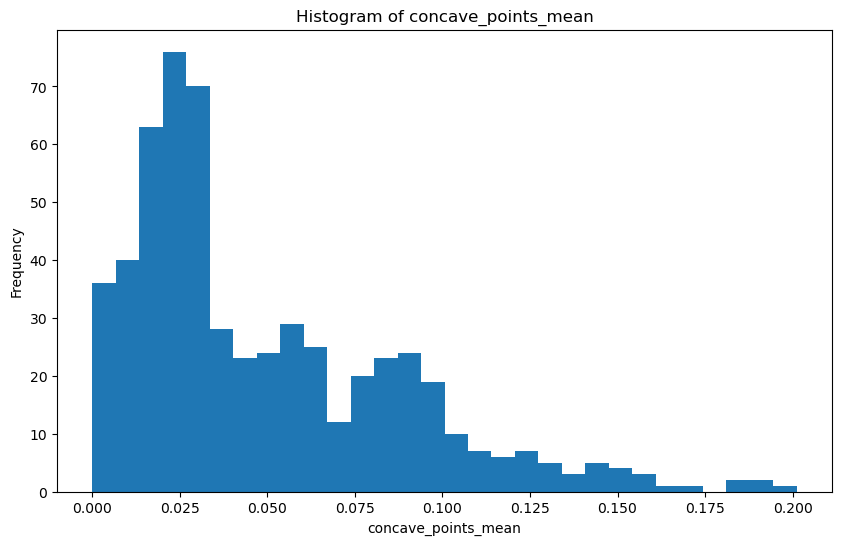

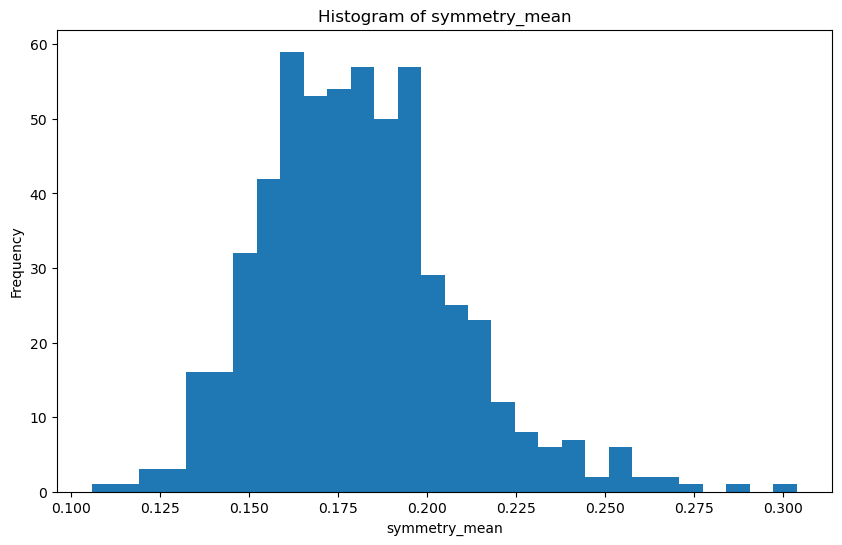

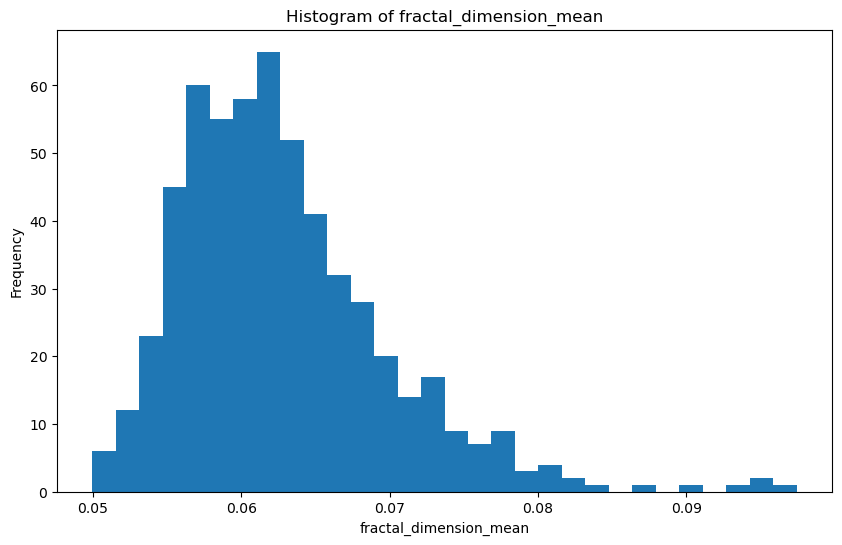

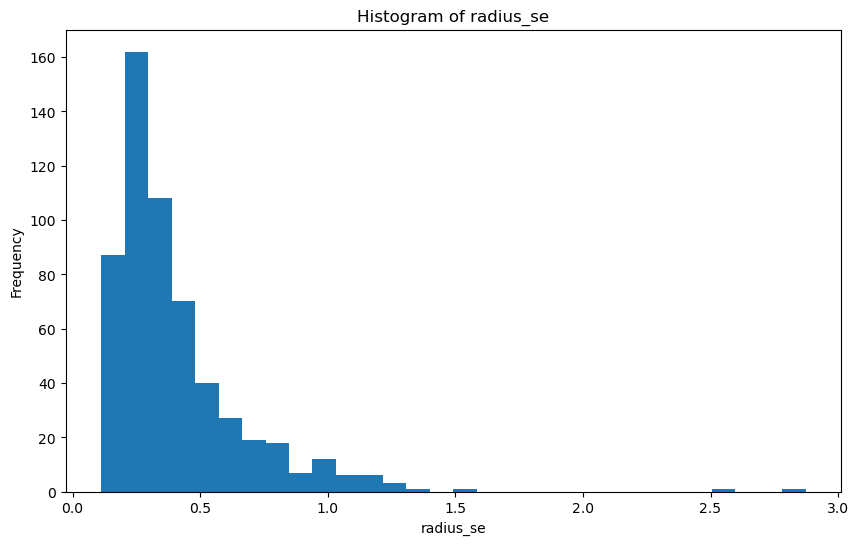

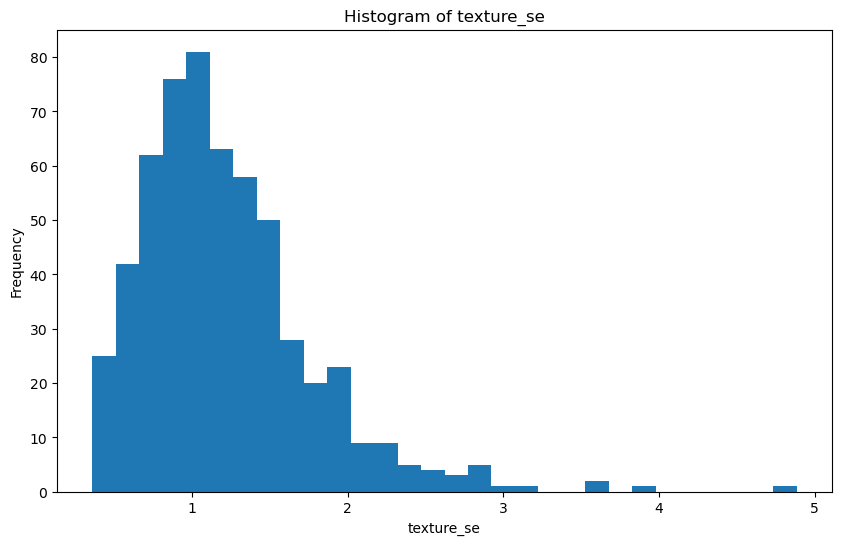

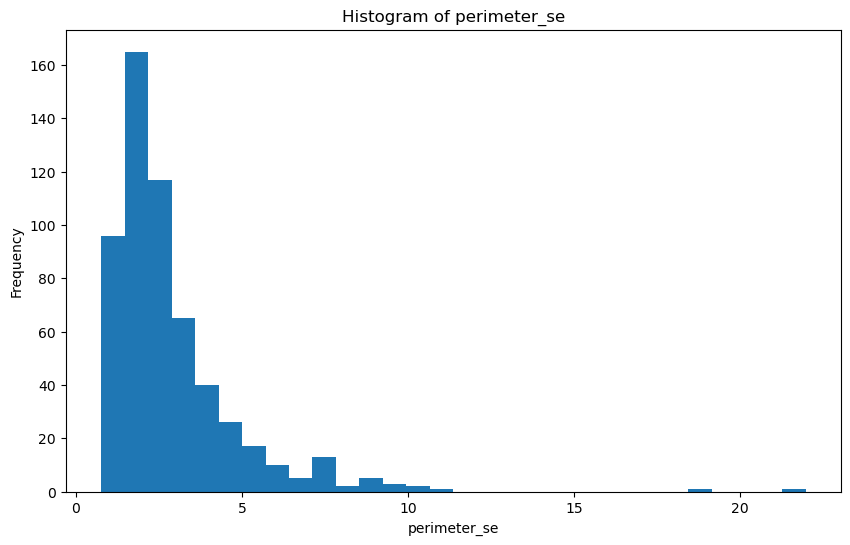

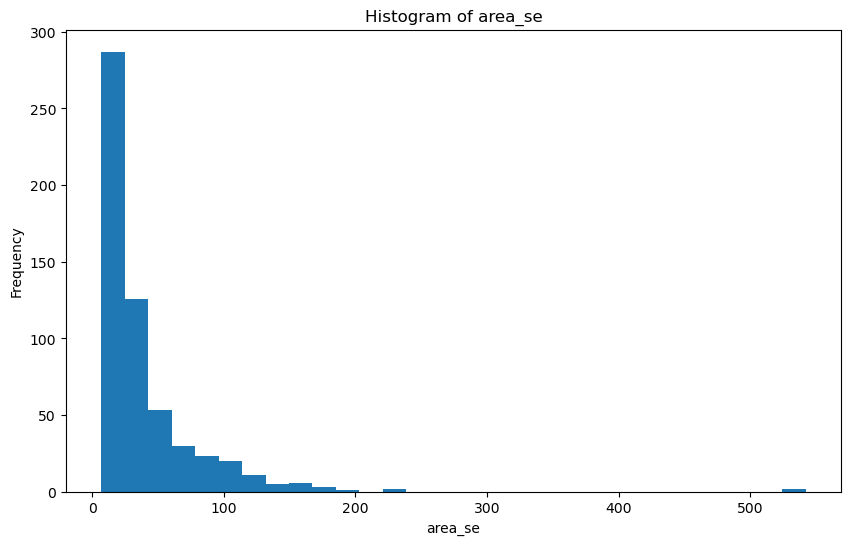

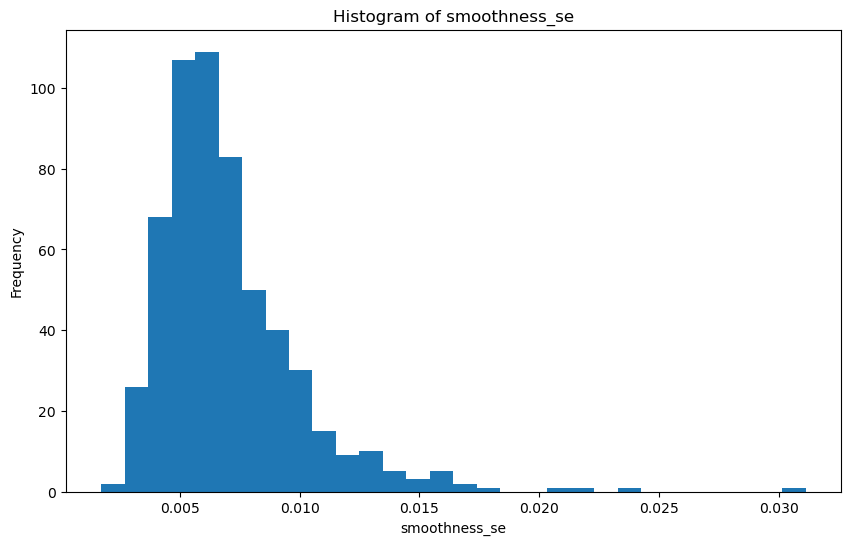

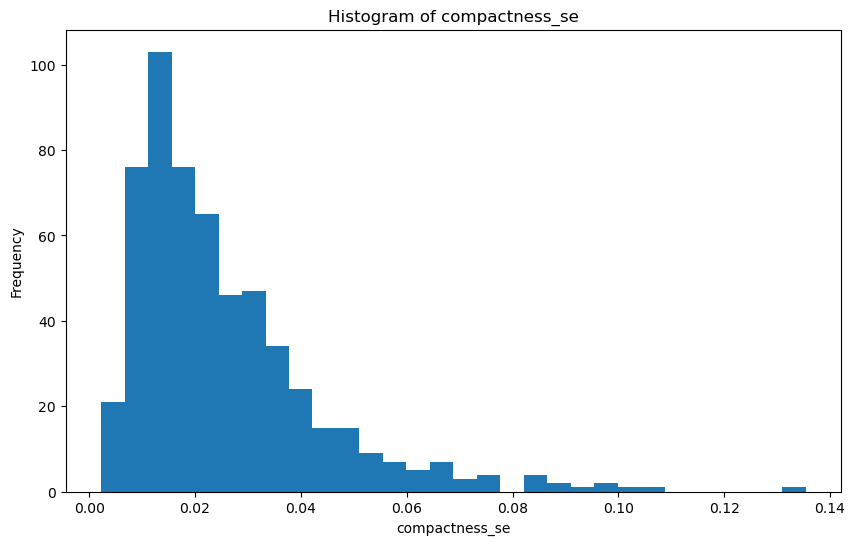

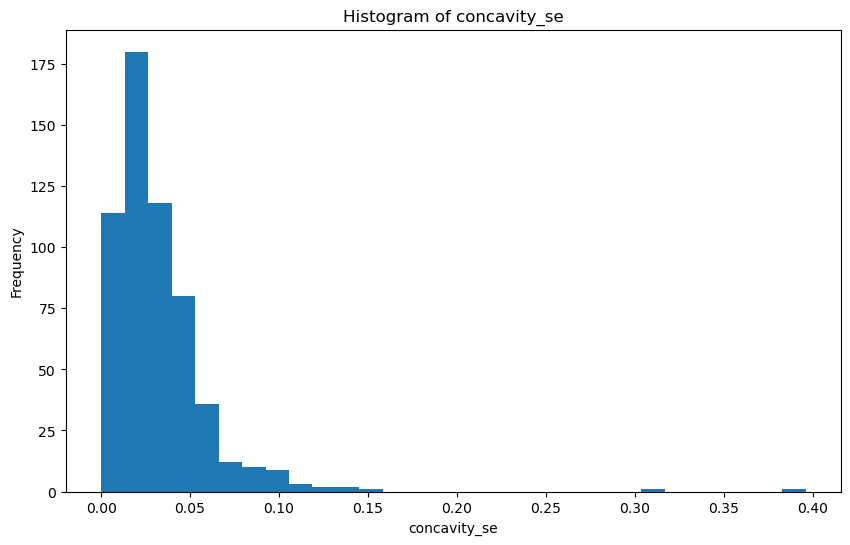

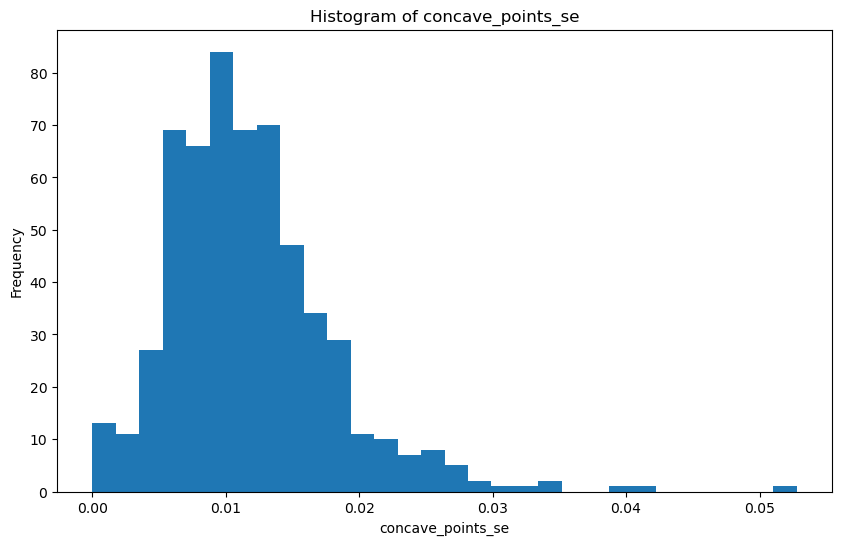

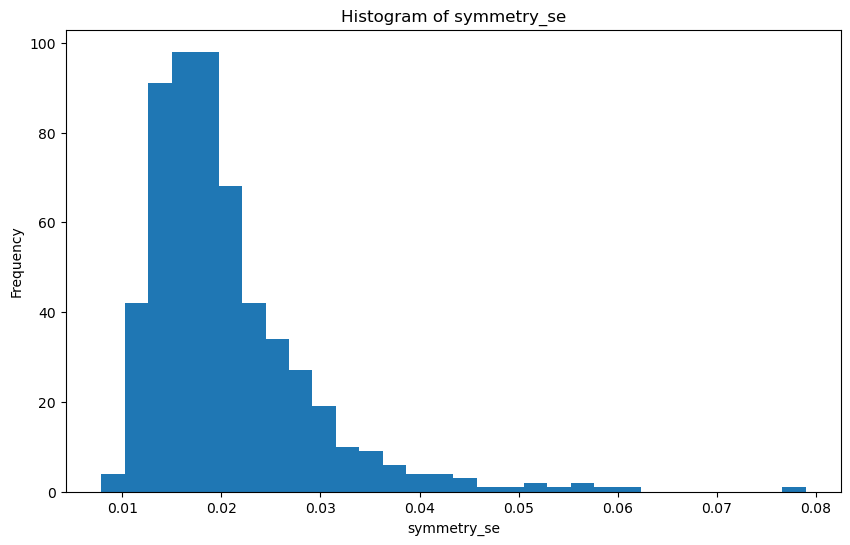

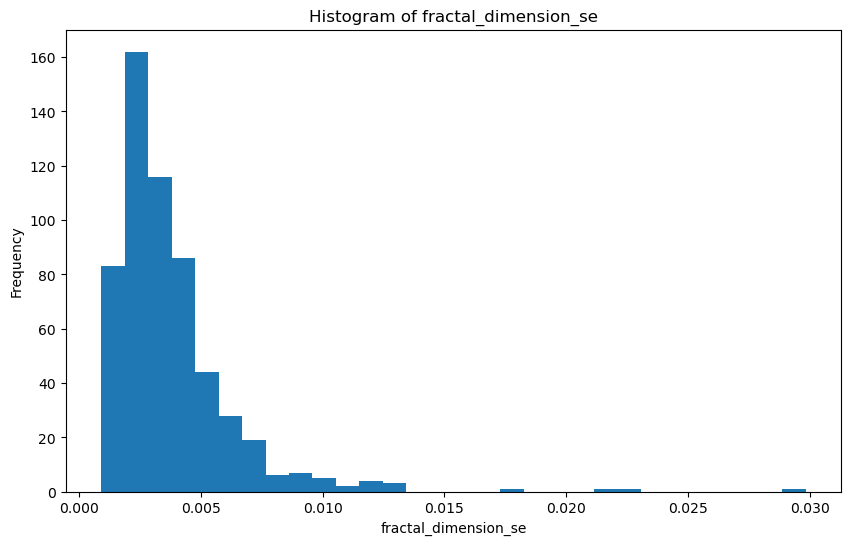

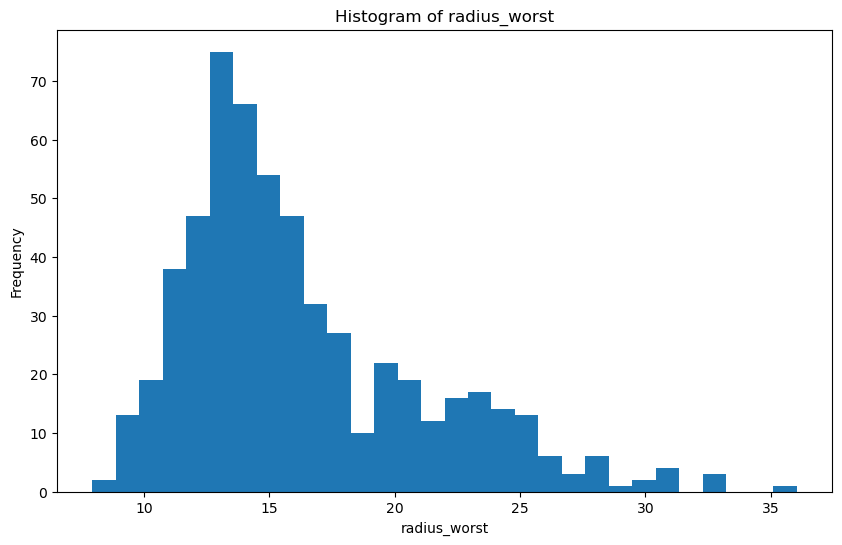

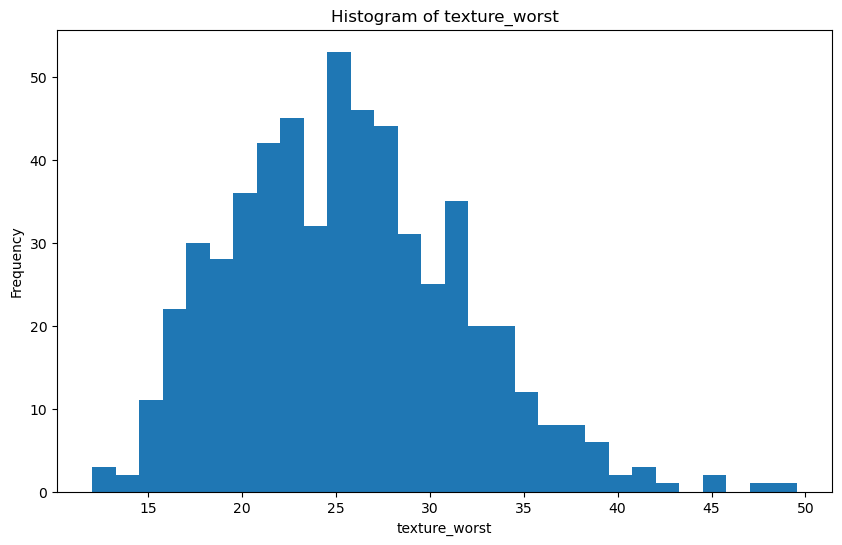

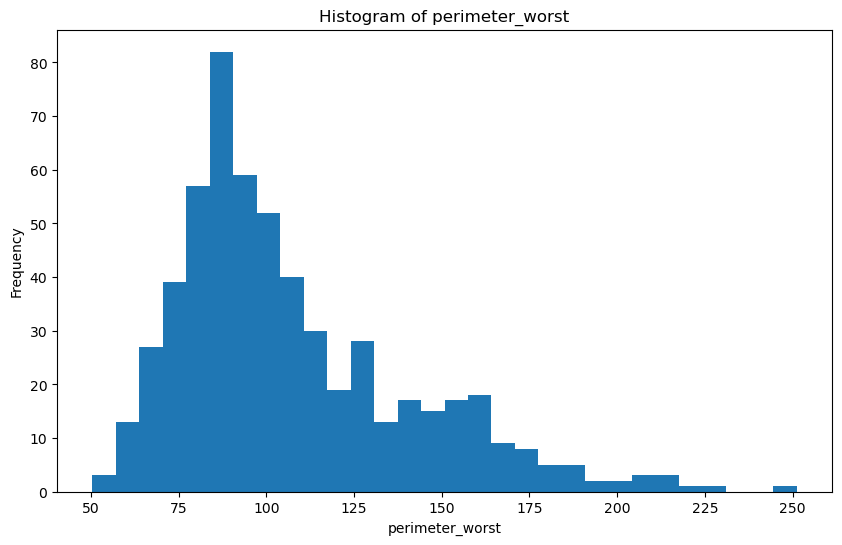

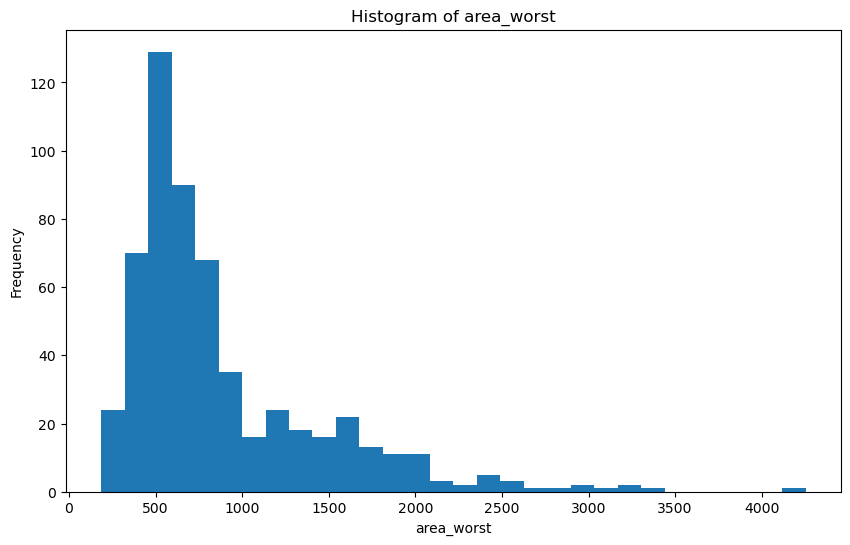

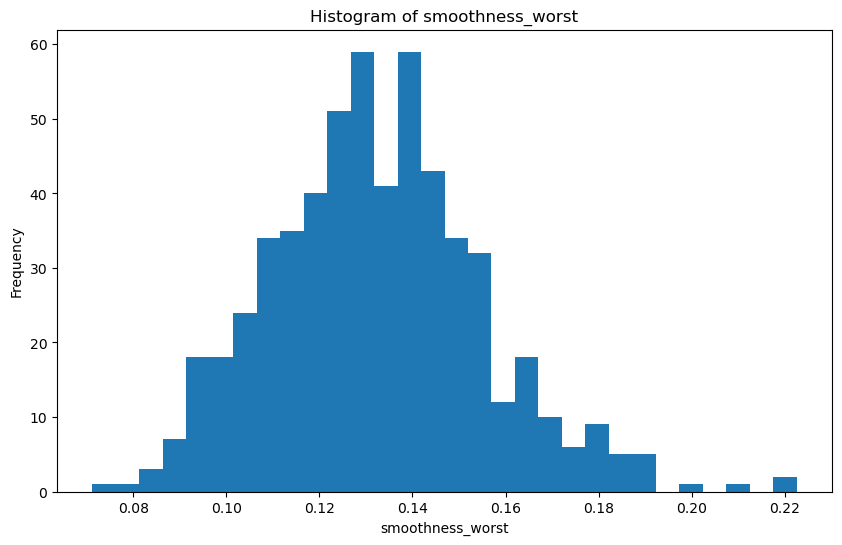

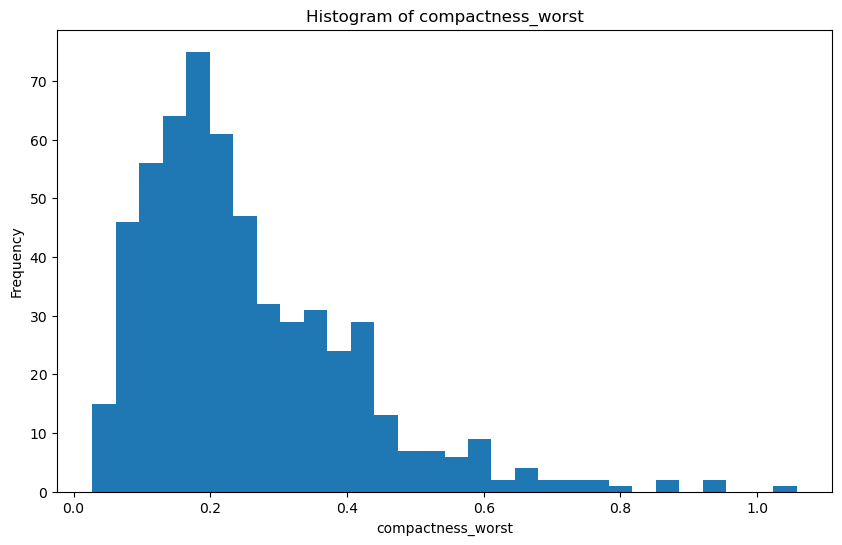

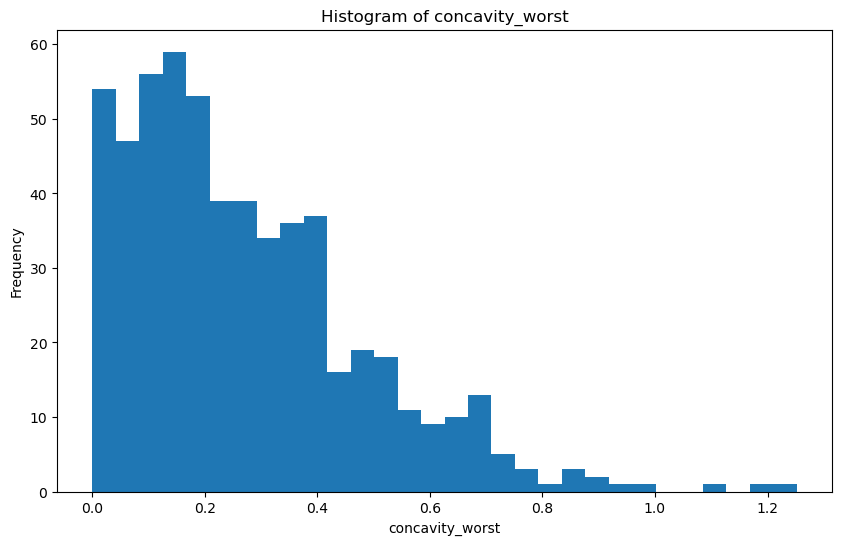

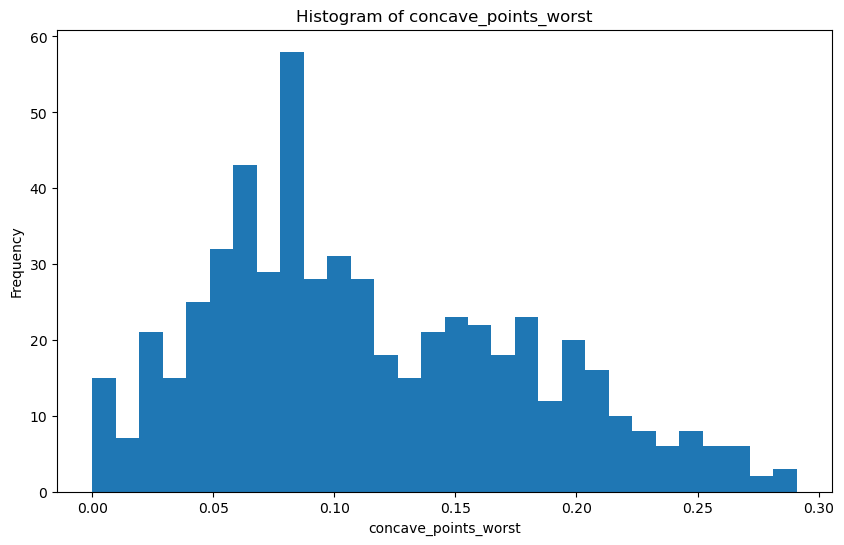

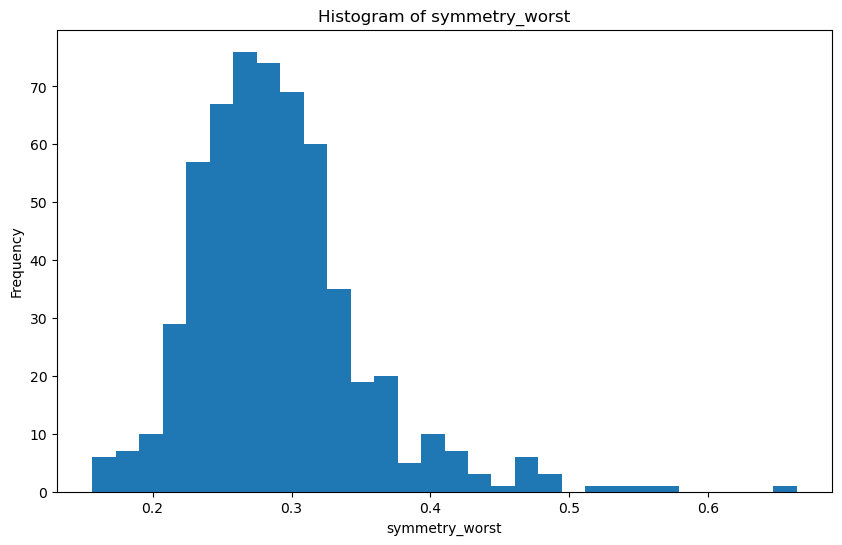

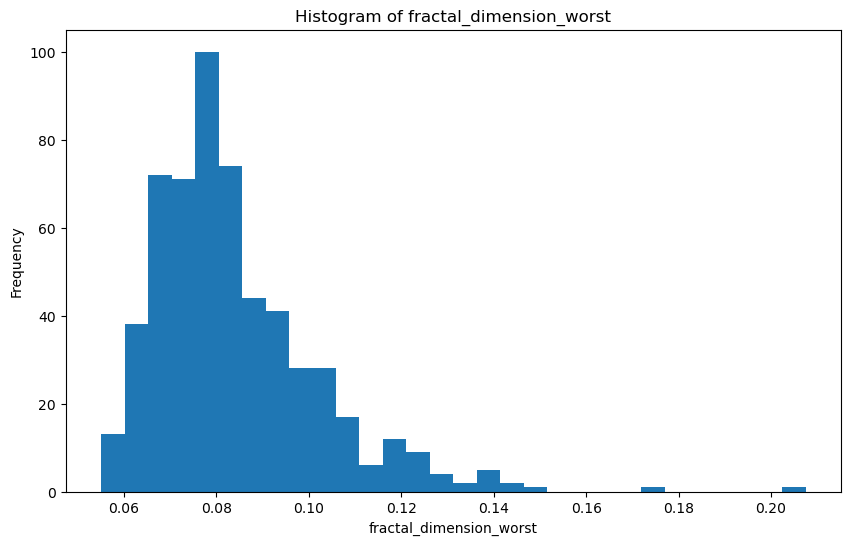

In [92]:
for column in df.columns:
    plt.figure(figsize=(10, 6))
    df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

In [93]:
X, y = df.drop("diagnosis", axis=1), df["diagnosis"]

X_train, X_test, y_train, y_test = standard_scaled(X, y)

logistic_regression_analysis(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       108
           1       1.00      0.95      0.98        63

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

The Accuracy: 0.9824561403508771


Epoch 1/100
28/28 [==============================] - 0s 4ms/step - loss: 1.2162 - accuracy: 0.5396 - val_loss: 1.1490 - val_accuracy: 0.6667
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 1.1404 - accuracy: 0.6835 - val_loss: 1.0815 - val_accuracy: 0.8250
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 1.0580 - accuracy: 0.7410 - val_loss: 1.0074 - val_accuracy: 0.8667
Epoch 4/100
28/28 [==============================] - 0s 1ms/step - loss: 0.9807 - accuracy: 0.7950 - val_loss: 0.9243 - val_accuracy: 0.8917
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 0.9037 - accuracy: 0.8165 - val_loss: 0.8394 - val_accuracy: 0.9167
Epoch 6/100
28/28 [==============================] - 0s 1ms/step - loss: 0.8730 - accuracy: 0.8058 - val_loss: 0.7779 - val_accuracy: 0.9250
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 0.7941 - accuracy: 0.8705 - val_loss: 0.7240 - val_accuracy: 0.9417
Epoch 8/100
2

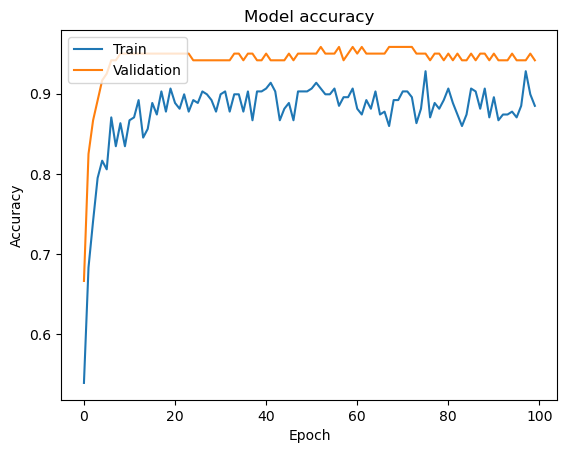

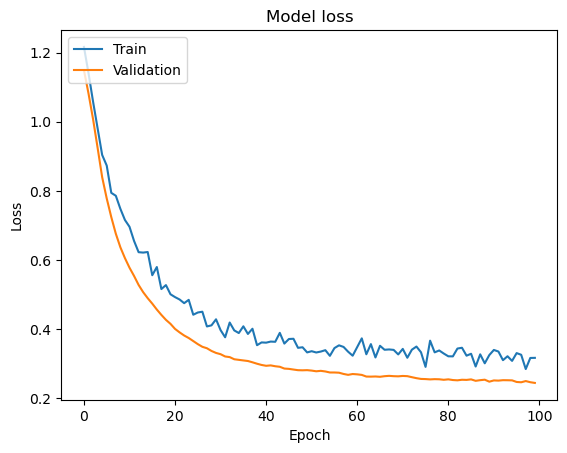

In [94]:
history = relu_dropout(X_train, X_test, y_train, y_test)


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [97]:
c_params = [0.01,0.1,1,10,100]

for c in c_params:
  print("------------------------------------------------")
  print(f"C param: {c}")
  lr = LogisticRegression(C=c, penalty='l1', solver='liblinear')
  lr.fit(X_train,y_train)
  y_pred = lr.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  
  print(classification_report(y_test,y_pred))
  print(f"The Accuracy: {accuracy}")
  print("------------------------------------------------")

------------------------------------------------
C param: 0.01
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       108
           1       0.88      0.97      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.94      0.94      0.94       171

The Accuracy: 0.9415204678362573
------------------------------------------------
------------------------------------------------
C param: 0.1
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

The Accuracy: 0.9707602339181286
------------------------------------------------
------------------------------------------------
C param:

In [98]:
lst = []
for c in c_params:

  model = Sequential()
  model.add(Dense(5, activation='relu', input_dim=X_train.shape[1], 
                    kernel_regularizer=regularizers.l1(c)))  # L1 regularization
  model.add(Dropout(0.5))  # Dropout layer after the first hidden layer
  model.add(Dense(15, activation='relu', 
                    kernel_regularizer=regularizers.l1(c)))  # L1 regularization
  model.add(Dense(1, activation='sigmoid'))  # Output layer

    # Compile the model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
  history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_split=0.3)
  lst.append(history)
    # Evaluate the model
  loss, accuracy = model.evaluate(X_test, y_test)
  print(f"TEST ACCURACY: {accuracy}")
  print(f"Test Loss is {loss}")

Epoch 1/100
28/28 [==============================] - 0s 5ms/step - loss: 1.2612 - accuracy: 0.4712 - val_loss: 1.1584 - val_accuracy: 0.6833
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 1.1293 - accuracy: 0.6331 - val_loss: 1.0858 - val_accuracy: 0.7417
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 1.0381 - accuracy: 0.7446 - val_loss: 1.0199 - val_accuracy: 0.7583
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 1.0151 - accuracy: 0.6871 - val_loss: 0.9536 - val_accuracy: 0.7833
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.9292 - accuracy: 0.7590 - val_loss: 0.8865 - val_accuracy: 0.8083
Epoch 6/100
28/28 [==============================] - 0s 1ms/step - loss: 0.8974 - accuracy: 0.7554 - val_loss: 0.8259 - val_accuracy: 0.8833
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 0.8405 - accuracy: 0.7554 - val_loss: 0.7688 - val_accuracy: 0.9167
Epoch 8/100
2

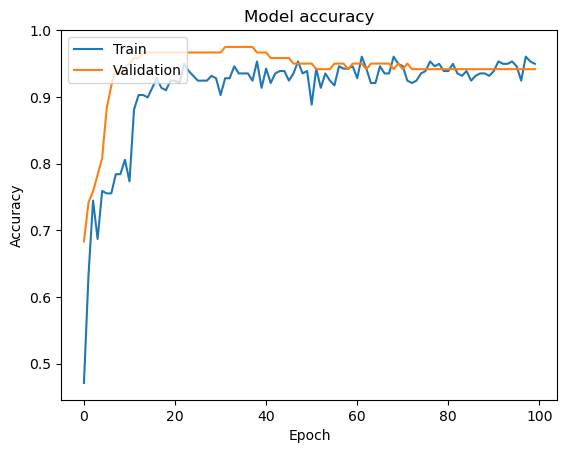

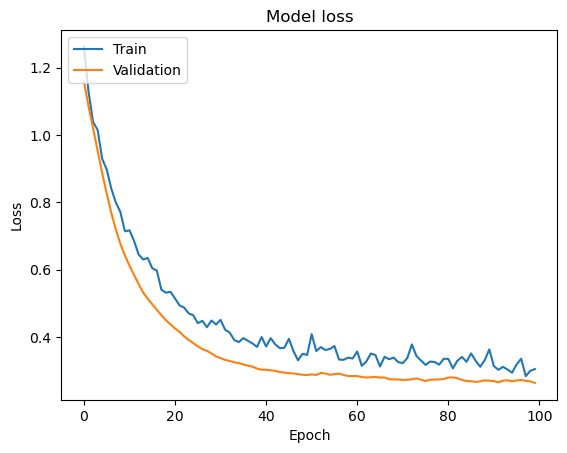

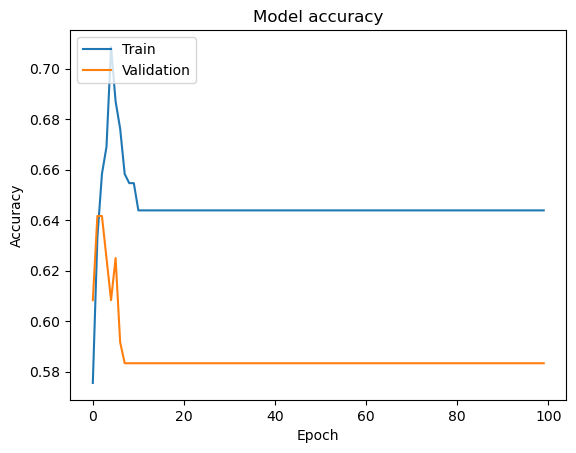

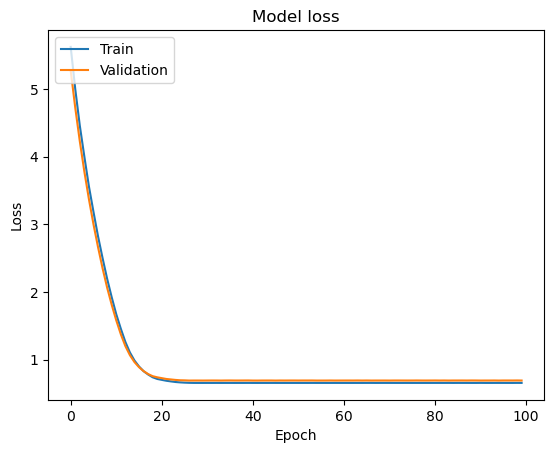

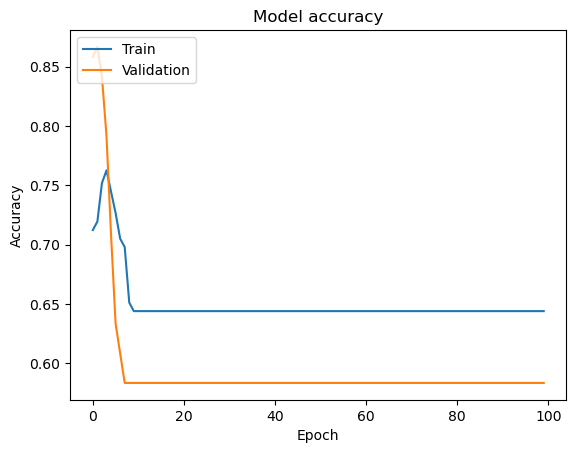

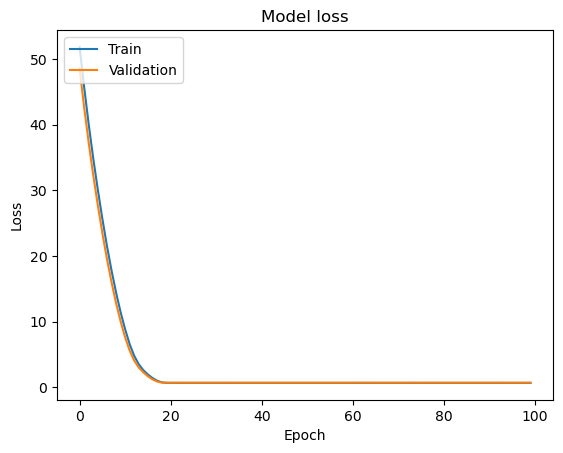

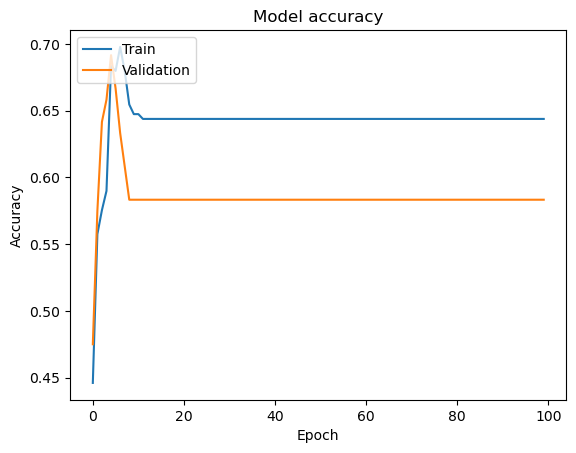

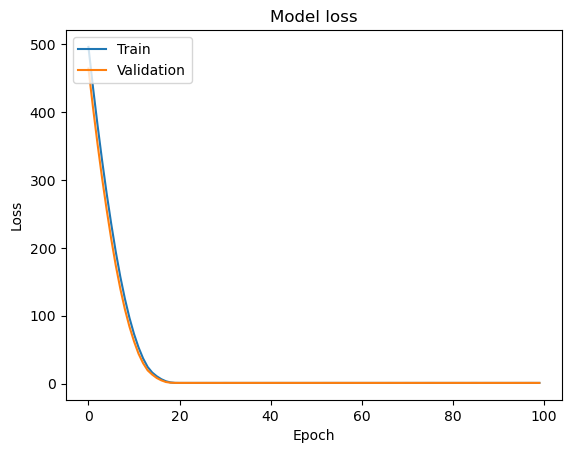

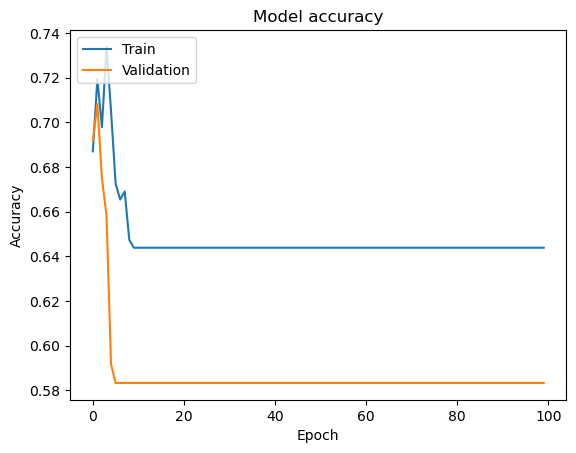

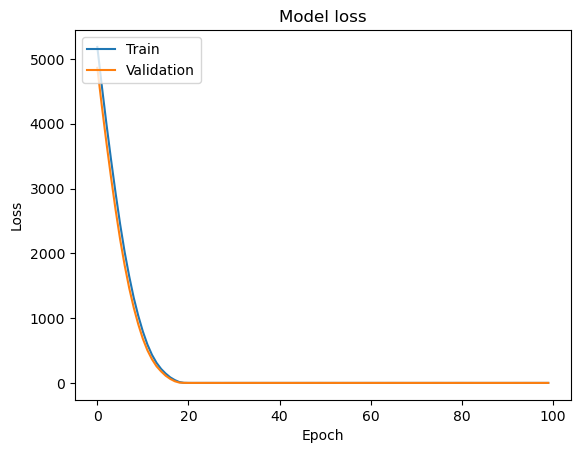

In [99]:
for history in lst:
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()